In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

t = 'bkg' # 'excess' # 
if t == 'excess':
    e = 'error'
else:
    e = 'difference'

# zALL
with open(f'data/error_{t}_relative_random.pickle','rb') as f: relall = pickle.load(f)
with open(f'data/error_{t}_percent_random.pickle','rb') as f: percall = pickle.load(f)
with open(f'data/error_{t}_absolute_random.pickle','rb') as f: absall = pickle.load(f)

# z20
with open(f'data/error_{t}_relative_z20.pickle','rb') as f: rel20 = pickle.load(f)[:2000]
with open(f'data/error_{t}_percent_z20.pickle','rb') as f: perc20 = pickle.load(f)[:2000]
with open(f'data/error_{t}_absolute_z20.pickle','rb') as f: abs20 = pickle.load(f)[:2000]
    
len(rel20), len(relall)

(2000, 2000)

In [25]:
# plot parameters
colors = ['orange', 'navy'] # ['navy', 'orange'] # 
labels = ['random zenith', '20° zenith'] # ['20° zenith', 'random zenith'] # 
hatches = ['\\', '//'] # ['//', '\\'] # 
histsize = (8,8)
fs = 16
nbins = 50
legends = [mpatches.Patch(facecolor='none', edgecolor=colors[0], hatch=hatches[0]), 
           mpatches.Patch(facecolor='none', edgecolor=colors[1], hatch=hatches[1])]

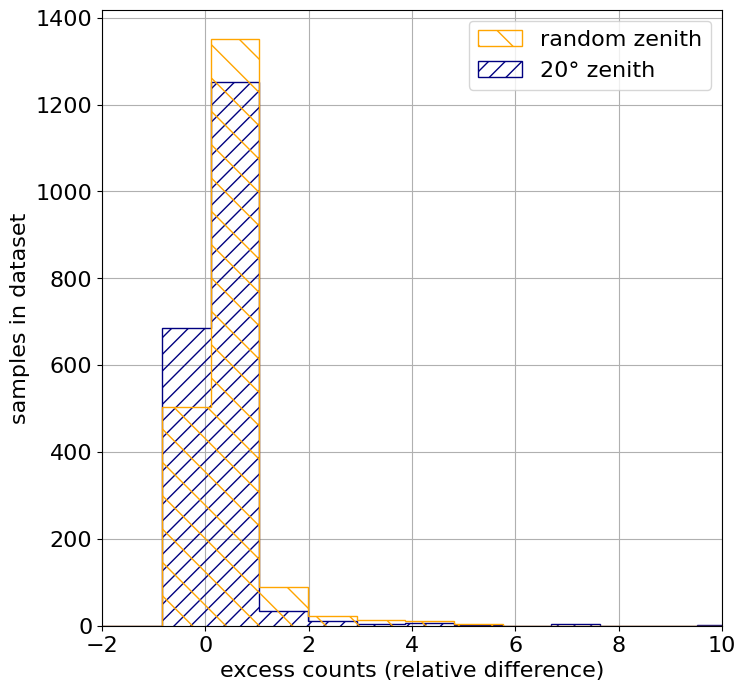

In [31]:
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (relall, rel20)
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel(f'excess counts (relative {e})', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
    
if t == 'bkg':
    ax.set_xlim([-2, 10])
plt.show()
fig.savefig(f'img/all_dataset_{t}_relative_{e}_z20_zALL.png')

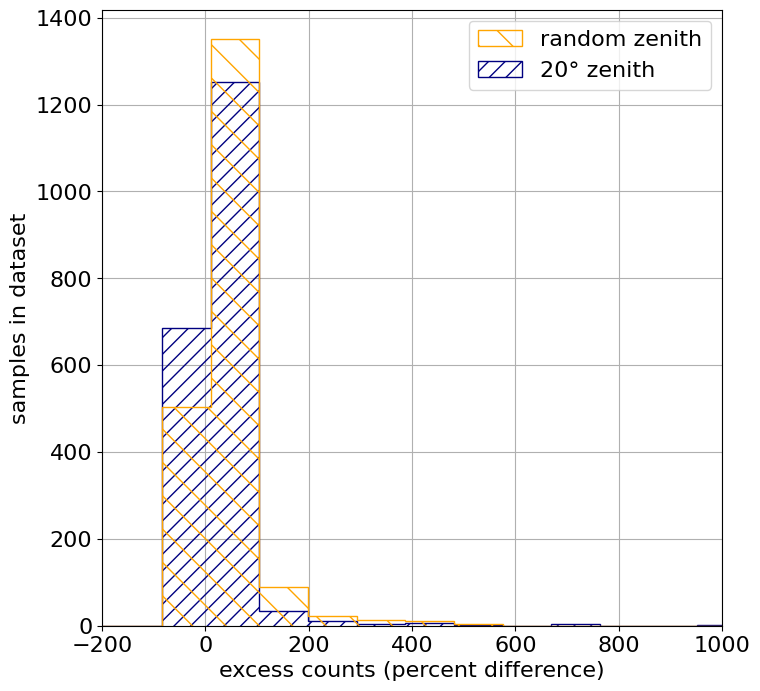

In [33]:
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (percall, perc20)
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel(f'excess counts (percent {e})', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
    
if t == 'bkg':
    ax.set_xlim([-200, 1000])
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_{t}_percent_{e}_z20_zALL.png')

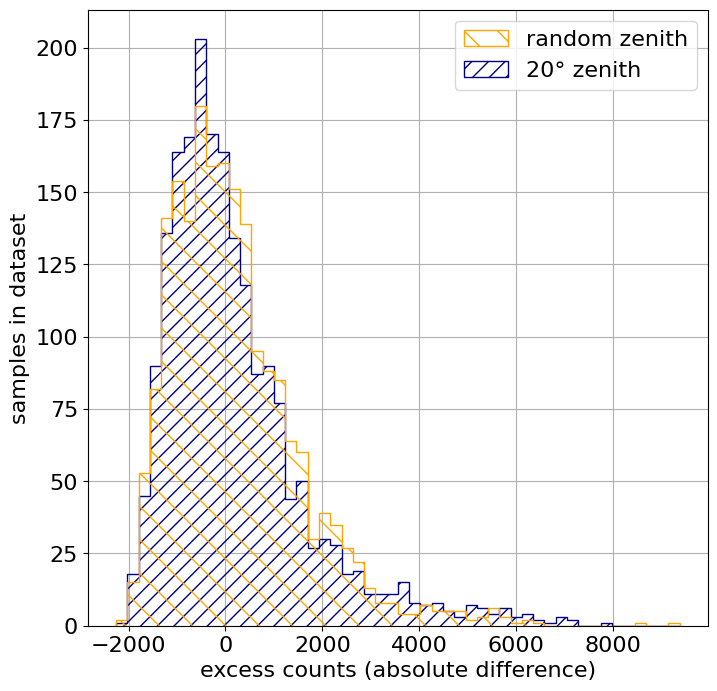

In [28]:
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (absall, abs20)
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel(f'excess counts (absolute {e})', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_{t}_percent_{e}_z20_zALL.png')

# Skewness

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution.  It is an important statistical methodology that is used to estimate the asymmetrical behavior rather than computing frequency distribution. Skewness can be two types:

Distribution on the basis of skewness value:
- Skewness = 0: Then normally distributed.
- Skewness > 0: Then more weight in the left tail of the distribution.
- Skewness < 0: Then more weight in the right tail of the distribution.

In [29]:
from scipy.stats import skew 
  
skew(absall, axis=0, bias=True), skew(abs20, axis=0, bias=True)

(1.4750332811633138, 1.7047426481775005)

# Kurtosis

It is also a statistical term and an important characteristic of frequency distribution. It determines whether a distribution is heavy-tailed in respect of the normal distribution. It provides information about the shape of a frequency distribution.

kurtosis for normal distribution is equal to 3.
- For a distribution having kurtosis < 3: It is called playkurtic. Heavier in the bulk!
- For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution. Heavier in the tail!

In [30]:
from scipy.stats import kurtosis 
  
kurtosis(absall, axis=0, bias=True), kurtosis(abs20, axis=0, bias=True)

(3.7721910355105948, 3.7824246643991737)

# Mean

In [36]:
np.mean(absall), np.mean(abs20)

(187.18750322666332, 188.03653381965324)

# Variance

In [37]:
np.var(absall), np.var(abs20)

(1840557.4539938967, 2180265.5226939293)

# Std

In [38]:
np.std(absall), np.std(abs20)

(1356.6714613324395, 1476.572220615683)